In [17]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime as dt 
from matplotlib.ticker  import PercentFormatter 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer 
from itertools import combinations
pd.options.mode.chained_assignment = None

In [13]:
!pip install yellowbrick

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 956.0 kB/s eta 0:00:00 0:00:01


In [19]:
df = pd.read_csv(r'/Users/yusufkhan/Desktop/online_retail_final.csv')

In [21]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [23]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [25]:
print("Min date: {} \nMax date: {}".format(df.InvoiceDate.min(),df.InvoiceDate.max()))

Min date: 2010-12-01 08:26:00 
Max date: 2011-12-09 12:50:00


In [33]:
last_day = df.InvoiceDate.max() + dt.timedelta(days=1)
last_day

Timestamp('2011-12-10 12:50:00')

In [39]:
df.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,392735.000000,392735.000000,392735,392735.000000,392735.000000,392735.000000
mean,560624.318859,10.242645,2011-07-11 00:54:06.081810944,2.787111,15300.835136,18.246537
min,536365.000000,1.000000,2010-12-01 08:26:00,0.120000,12347.000000,0.120000
25%,549233.000000,2.000000,2011-04-07 11:06:00,1.250000,13975.000000,4.680000
50%,561894.000000,5.000000,2011-07-31 15:00:00,1.950000,15159.000000,11.700000
75%,572103.000000,12.000000,2011-10-20 15:57:00,3.750000,16800.000000,19.500000
max,581587.000000,147.000000,2011-12-09 12:50:00,19.960000,18287.000000,1914.240000
std,13113.076784,16.172009,NaN,2.704759,1709.095993,32.558080


In [53]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

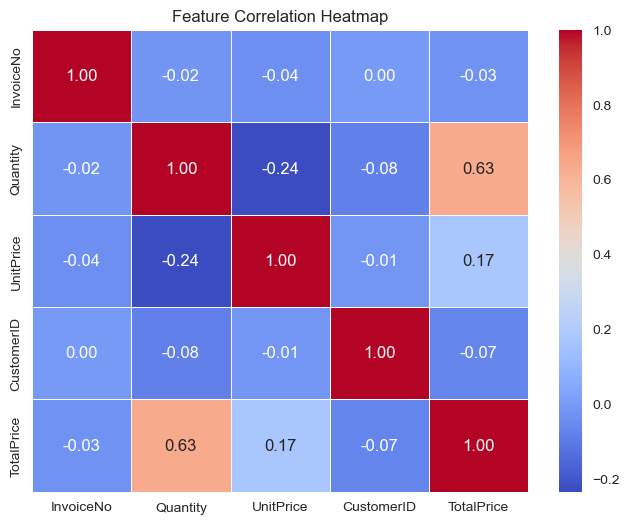

In [68]:
correlation_matrix = df.select_dtypes(include=["number"]).corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [82]:
rfm_table = df.groupby("CustomerID").agg({"InvoiceDate": lambda x:(last_day - x.max()).days,"InvoiceNo" : "nunique","TotalPrice": "sum"})


In [84]:
rfm_table

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12347.0,2,7,4060.40
12348.0,75,4,1437.24
12349.0,19,1,1417.60
12350.0,310,1,294.40
12352.0,36,7,1385.74
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05


In [94]:
rfm_table.rename(columns={"InvoiceNo": "Frequency", 
                   "InvoiceDate": "Recency", "TotalPrice": "Monetary"}, inplace=True)

In [96]:
rfm_table

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,7,4060.40
12348.0,75,4,1437.24
12349.0,19,1,1417.60
12350.0,310,1,294.40
12352.0,36,7,1385.74
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05


In [98]:
r_labels = range(5,0,-1)
fm_labels = range(1,6)

In [104]:
rfm_table["R"]= pd.qcut(rfm_table["Recency"],5,labels=r_labels)
rfm_table["F"]= pd.qcut(rfm_table["Frequency"].rank(method='first'),5,labels=fm_labels)
rfm_table["M"]= pd.qcut(rfm_table["Monetary"],5,labels=fm_labels)

In [106]:
rfm_table

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347.0,2,7,4060.40,5,5,5
12348.0,75,4,1437.24,2,4,4
12349.0,19,1,1417.60,4,1,4
12350.0,310,1,294.40,1,1,2
12352.0,36,7,1385.74,3,5,4
...,...,...,...,...,...,...
18280.0,278,1,180.60,1,2,1
18281.0,181,1,80.82,1,2,1
18282.0,8,2,178.05,5,3,1


In [108]:
rfm_table['Segment']=rfm_table['R'].astype(str)+rfm_table['F'].astype(str)+rfm_table['M'].astype(str)
rfm_table['Score']=rfm_table[['R','F','M']].sum(axis=1)

In [110]:
rfm_table

,Recency,Frequency,Monetary,R,F,M,Segment,Score
CustomerID,,,,,,,,
12347.0,2,7,4060.40,5,5,5,555,15
12348.0,75,4,1437.24,2,4,4,244,10
12349.0,19,1,1417.60,4,1,4,414,9
12350.0,310,1,294.40,1,1,2,112,4
12352.0,36,7,1385.74,3,5,4,354,12
...,...,...,...,...,...,...,...,...
18280.0,278,1,180.60,1,2,1,121,4
18281.0,181,1,80.82,1,2,1,121,4
18282.0,8,2,178.05,5,3,1,531,9
